First, let's begin with importing some packages. All of what I will be going through this evening can be done with only these two packages- numpy and pandas. 

In [67]:
import pandas as pd
import numpy as np

In [37]:
from warnings import simplefilter

In [38]:
survey_results = pd.read_csv("movie_survey.csv")
survey_results .head()

,participant_id,first_name,last_name,email,gender,movie,genre
0,1,Vernen,NaN,NaN,Male,Blue Steel,Action|Thriller
1,2,Dulsea,NaN,dcolvill1@tripadvisor.com,NaN,Around the World in 80 Days,Adventure|Children|Comedy
2,3,Kirby,Etteridge,NaN,Male,Toronto Stories,Drama
3,4,Ulrike,Sailor,usailor3@prweb.com,Female,Miral,Drama
4,5,Allayne,Kingston,akingston4@opera.com,Female,"Inquisitor, The (a.k.a. Under Suspicion) (Gard...",Crime|Drama


In [39]:
num_rows = 0
for row in open("movie_survey.csv"):
    num_rows += 1

print("There are",num_rows,"rows in this data table.") 

There are 1001 rows in this data table.


In [40]:
survey_results .isnull().T.any().T.sum()
print("The number of rows that have some information missing is:",survey_results.isnull().T.any().T.sum())

The number of rows that have some information missing is: 693


In [41]:
decimal = ((survey_results .isnull().T.any().T.sum())/num_rows)
percent = decimal * 100
print("That's",(percent),"percent of the rows in this dataset that is missing information")

That's 69.23076923076923 percent of the rows in this dataset that is missing information


In [42]:
has_NaN = survey_results.isnull()
has_NaN.head() #True is [NULL]s

,participant_id,first_name,last_name,email,gender,movie,genre
0,False,False,True,True,False,False,False
1,False,False,True,False,True,False,False
2,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [43]:
#Nan inputs instead of True/False just to visualize 
row_has_NaN = has_NaN.any(axis=1)
rows_with_NaN = survey_results[row_has_NaN]
rows_with_NaN.head()

,participant_id,first_name,last_name,email,gender,movie,genre
0,1,Vernen,NaN,NaN,Male,Blue Steel,Action|Thriller
1,2,Dulsea,NaN,dcolvill1@tripadvisor.com,NaN,Around the World in 80 Days,Adventure|Children|Comedy
2,3,Kirby,Etteridge,NaN,Male,Toronto Stories,Drama
5,6,Bernie,Annon,NaN,Female,"Heroes of Telemark, The",Action|Drama|War
6,7,Bil,Hallen,NaN,Male,"Collector, The",NaN


In [44]:
#Below is prior to loop, and figuring out code to apply w/n loop 

In [45]:
jobID_null = has_NaN.participant_id.value_counts()
jobID_null 

False    1000
Name: participant_id, dtype: int64

In [46]:
print("There are",has_NaN.participant_id.sum(),"missing values out of",num_rows,"rows under the participant_id column   ")

There are 0 missing values out of 1001 rows under the participant_id column   


In [47]:
#Discusshow the participant is the primary key and why that is important 

In [48]:
first_name= has_NaN.first_name.value_counts()
first_name

False    944
True      56
Name: first_name, dtype: int64

In [49]:
last_name= has_NaN.last_name.value_counts()
last_name

False    612
True     388
Name: last_name, dtype: int64

In [50]:
#Talk about easy mistakes 
last_name= has_NaN.first_name.value_counts()
last_name

False    944
True      56
Name: first_name, dtype: int64

In [51]:
fn_count = has_NaN.first_name.sum()
fn_count

56

In [52]:
fn_percent = float((fn_count/num_rows) * 100)
fn_percent

5.594405594405594

In [53]:
print("The % of missing entries in company column is:",format(fn_percent,".2f"),"%, which is",fn_count,"divided by",num_rows)
#acknowledge it's rather over here, but let's say...."

The % of missing entries in company column is: 5.59 %, which is 56 divided by 1001


In [54]:
#Or you could do this the easy a simplar 

In [55]:
for column in has_NaN :

    columnSeriesObj = has_NaN[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.value_counts())
    print('Missing count w/n column:',column,'is',float((columnSeriesObj.sum())))
    print('Column Missing Percent: ',format(float((columnSeriesObj.sum()/num_rows)* 100),".2f"),"%, which is",columnSeriesObj.sum(),"divided by",num_rows,"\n\n")

Column Name :  participant_id
Column Contents :  False    1000
Name: participant_id, dtype: int64
Missing count w/n column: participant_id is 0.0
Column Missing Percent:  0.00 %, which is 0 divided by 1001 


Column Name :  first_name
Column Contents :  False    944
True      56
Name: first_name, dtype: int64
Missing count w/n column: first_name is 56.0
Column Missing Percent:  5.59 %, which is 56 divided by 1001 


Column Name :  last_name
Column Contents :  False    612
True     388
Name: last_name, dtype: int64
Missing count w/n column: last_name is 388.0
Column Missing Percent:  38.76 %, which is 388 divided by 1001 


Column Name :  email
Column Contents :  False    709
True     291
Name: email, dtype: int64
Missing count w/n column: email is 291.0
Column Missing Percent:  29.07 %, which is 291 divided by 1001 


Column Name :  gender
Column Contents :  False    869
True     131
Name: gender, dtype: int64
Missing count w/n column: gender is 131.0
Column Missing Percent:  13.09 %, 

In [56]:
#How to Save as a txt file
#make sure to upload attached 

In [57]:
destFile = open('survey_missing_percent.txt','w')
for column in has_NaN :

    columnSeriesObj = has_NaN[column]
    print('Column Name : ', column, file = destFile)
    print('Column Contents : ', columnSeriesObj.value_counts(), file = destFile)
    print('Missing count w/n column:',column,'is',float((columnSeriesObj.sum())), file = destFile)
    print('Column Missing percent: ',format(float((columnSeriesObj.sum()/num_rows)* 100),".2f"),"%, which is",columnSeriesObj.sum(),"divided by",num_rows,"\n\n", file = destFile)
destFile.close()

In [58]:
##----------------------------------------

In [59]:
app = dash.Dash(__name__)

In [60]:
#!conda install -c conda-forge "datapane>=0.10.0"

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio


conda install -c conda-forge datapane

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")
from datetime import datetime
import datapane as dp
import missingno as msno
from vega_datasets import data as vds

<AxesSubplot:>

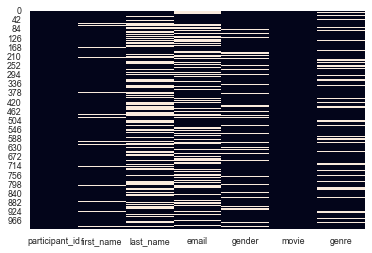

In [63]:
sns.heatmap(survey_results.isnull(), cbar = False)

<AxesSubplot:>

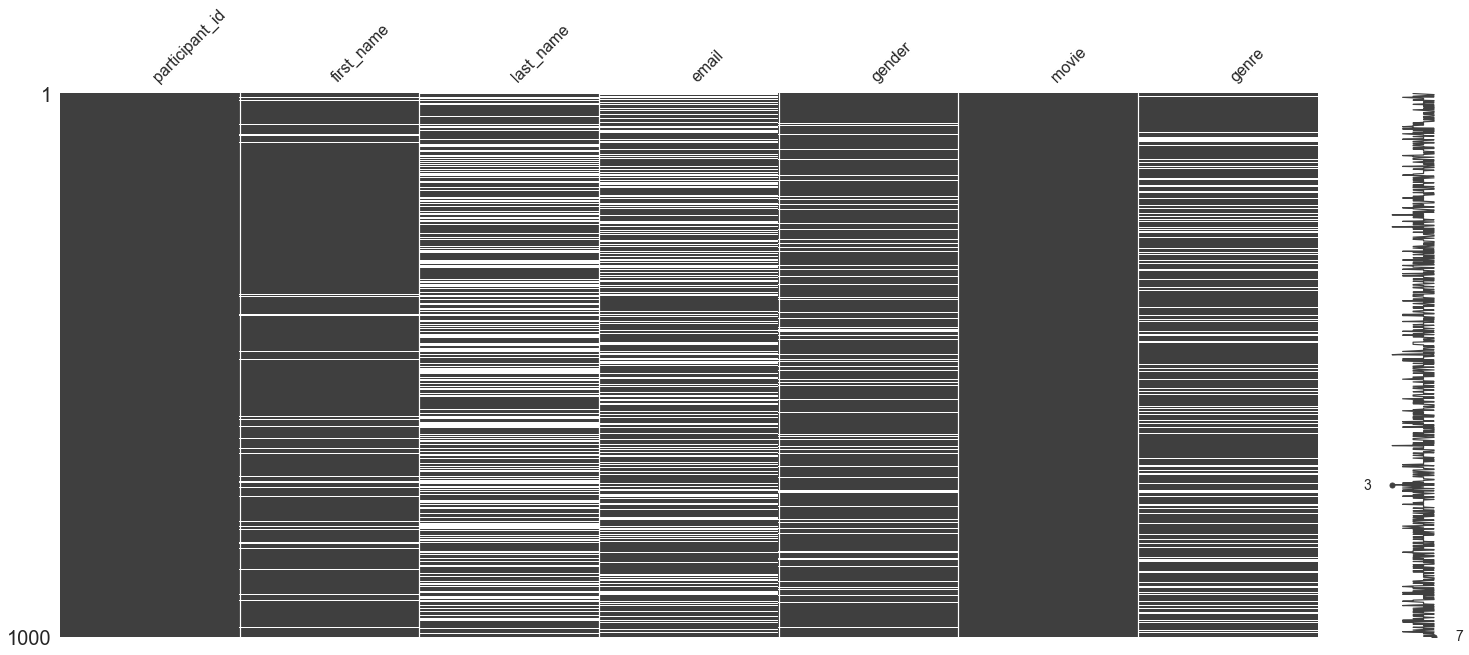

In [64]:
msno.matrix(survey_results)

<AxesSubplot:>

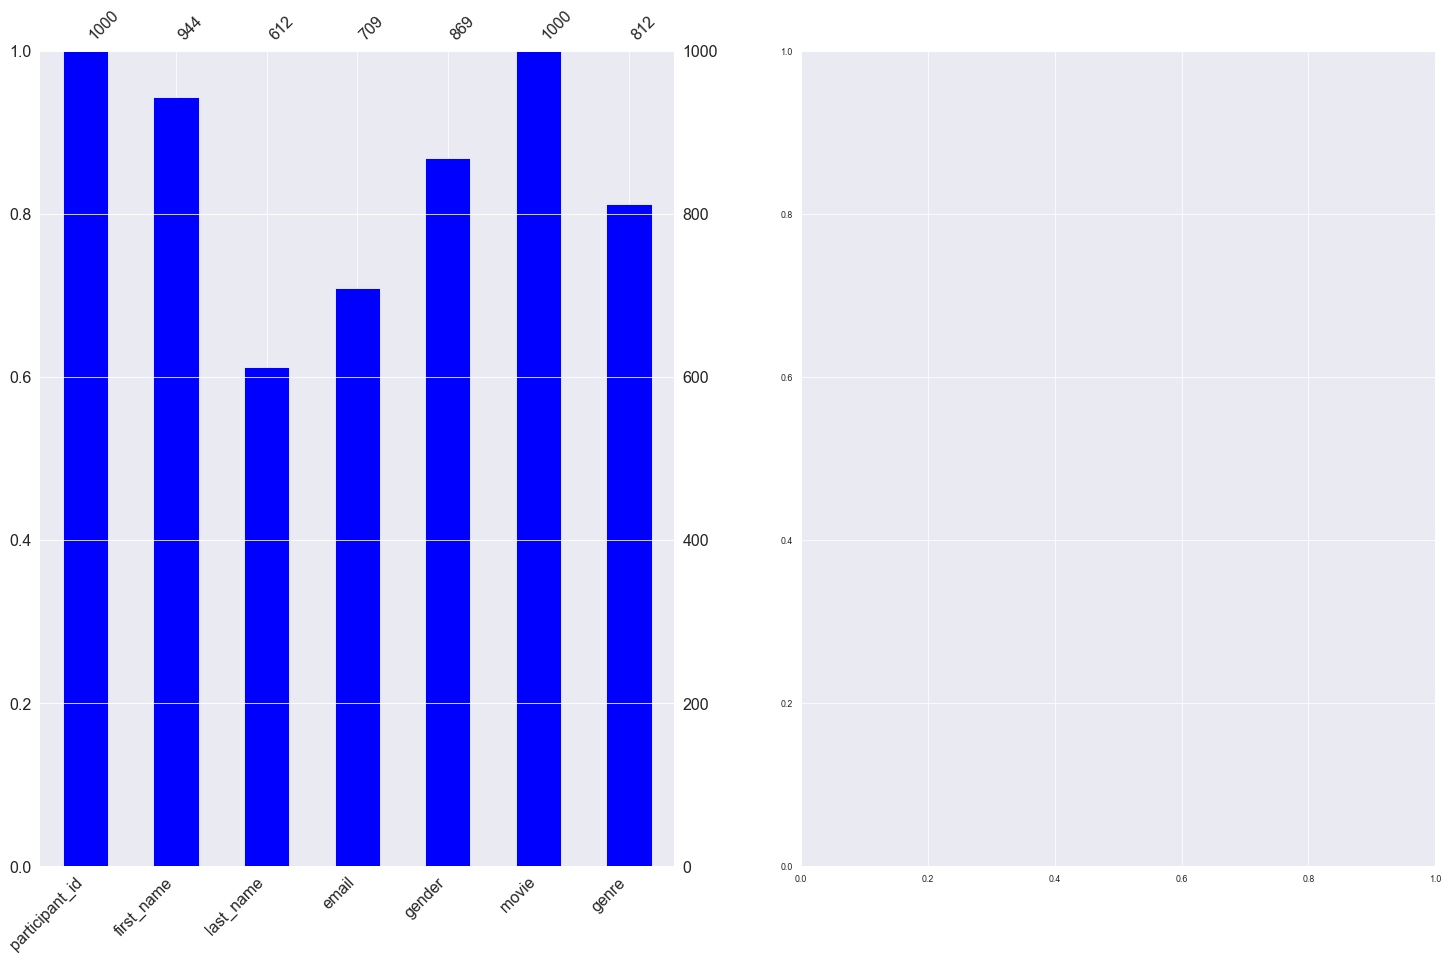

In [65]:
fig, ax = plt.subplots(figsize=(25, 15),nrows=1,ncols=2)
msno.bar(survey_results,ax=ax[0], color="blue")
#White space indicates missing value